We are going to Create Model for following case :
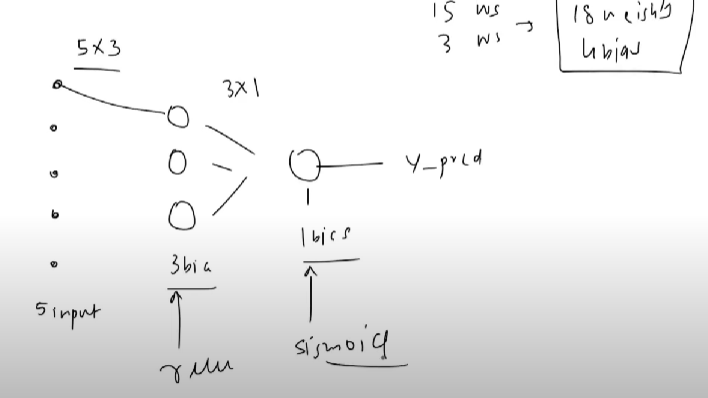

In [80]:
import torch
import torch.nn as nn

# # Create Model Class
# class Model(nn.Module):   # imp
#     def __init__(self, num_features):
#         super(Model, self).__init__()   # invoking the constructor of Parent Class i.e nn.Module by child class i.e Model
#         self.layer1 = nn.Linear(num_features, 3)  # (input , output)
#         self.relu = nn.ReLU()
#         self.layer2 = nn.Linear(3,1)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, features):
#         out = self.layer1(features)   # Calculating Z
#         out = self.relu(out)       # output
#         out = self.layer2(out)
#         out = self.sigmoid(out)
#         return out


# Another way to do the above thing :  Put all the layers into a container
# Create Model Class
class Model(nn.Module):   # imp
    def __init__(self, num_features):
        super(Model, self).__init__()   # invoking the constructor of Parent Class i.e nn.Module by child class i.e Model
        self.network  = nn.Sequential(
              nn.Linear(num_features, 3),  # (input , output)
              nn.ReLU(),
              nn.Linear(3,1),
              nn.Sigmoid()
        )

    def forward(self, features):
        out = self.network(features)
        return out

In [81]:
#Create dataset
features = torch.rand(10,5)   # 5 feartues

#Create Model
model = Model(features.shape[1])

# We don't need to call the :
#  model.forward(features)   : it will work but its not recommended better do the following
model(features)  # it will automatically call the forward



tensor([[0.6983],
        [0.6871],
        [0.6934],
        [0.6849],
        [0.6866],
        [0.7034],
        [0.6918],
        [0.6794],
        [0.6803],
        [0.7030]], grad_fn=<SigmoidBackward0>)

In [84]:
# !pip install torchinfo

In [85]:
 from torchinfo import summary

 summary(model, input_size=(10,5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Sequential: 1-1                        [10, 1]                   --
│    └─Linear: 2-1                       [10, 3]                   18
│    └─ReLU: 2-2                         [10, 3]                   --
│    └─Linear: 2-3                       [10, 1]                   4
│    └─Sigmoid: 2-4                      [10, 1]                   --
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [86]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [87]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')

In [88]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [89]:
df.drop(columns = ['id' , 'Unnamed: 32'] , inplace = True)

In [90]:
X_train , X_test , y_train , y_text =train_test_split(df.iloc[:,1:] , df.iloc[:,0] , test_size = 0.2)

In [91]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [92]:
X_train

array([[-0.71888138, -0.06437033, -0.75519574, ..., -0.89420369,
         1.00500238, -0.82934292],
       [-0.47953643, -0.0736147 , -0.44907484, ..., -0.36173668,
        -1.2897018 , -0.69473961],
       [-0.25410689, -0.69298799, -0.28048651, ..., -0.40510162,
        -1.4123324 , -0.43723761],
       ...,
       [ 1.36007993,  1.25064236,  1.58689135, ...,  0.90823641,
         0.48256241,  1.08553554],
       [-0.39326093, -0.73458769, -0.43052205, ..., -0.88831089,
         1.20154732, -0.76847881],
       [-0.60755815, -0.38561244, -0.60435356, ..., -0.81487759,
         0.26921876, -0.75735941]])

In [93]:
y_train

,diagnosis
310,B
355,B
124,B
2,M
35,M
...,...
66,B
560,B
12,M
268,B


In [94]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_text = encoder.transform(y_text)


In [95]:
y_train

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [96]:
X_train_tensor = torch.from_numpy(X_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.from_numpy(y_train).float()
y_test_tensor = torch.from_numpy(y_text).float()

In [97]:
X_train_tensor.shape

torch.Size([455, 30])

Model

In [98]:
class MySimpleNN(nn.Module):
    def __init__(self , num_features):
      super(MySimpleNN, self).__init__()
      self.network = nn.Sequential(
          nn.Linear(num_features , 1),
          nn.Sigmoid()
      )

    def forward(self , features):
      out = self.network(features)
      return out


    # def loss_function(self, y_pred, y):
    #   # Clamp predictions to avoid log(0)
    #   epsilon = 1e-7
    #   y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)

    #   # Calculate loss
    #   loss = -(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred)).mean()
    #   return loss

In [99]:
learing_rate = 0.1
epochs = 25

In [100]:
loss = nn.BCELoss()

In [102]:
# Create Model
num_features = X_train_tensor.shape[1]
model = MySimpleNN(num_features)

# Define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learing_rate)


# Define loop : number of epochs
for epoch in range (epochs):
  # Forward
  y_pred = model(X_train_tensor)

  # Loss

  calculated_loss = loss(y_pred , y_train_tensor.reshape(-1,1))

  # Backward
  calculated_loss.backward()


  # With Container

  # Update
  optimizer.step()

  # zero gradients
  optimizer.zero_grad()


# Can use following if We are not using container :

  # with torch.no_grad():  # to avoid Gradient Tracking (Calculation of gradient after training)
  #   model.linear.weight -= learing_rate * model.linear.weight.grad
  #   model.linear.bias -= learing_rate * model.linear.bias.grad

  # # zero gradients to # Clearing Grad : initialize with 0 every time before moving to next epoch otherwise gradient will accumulate
  # model.linear.weight.grad.zero_()
  # model.linear.bias.grad.zero_()

  print(f'Epoch {epoch+1} , Loss : {calculated_loss.item():.4f}')

Epoch 1 , Loss : 0.8204
Epoch 2 , Loss : 0.5791
Epoch 3 , Loss : 0.4616
Epoch 4 , Loss : 0.3955
Epoch 5 , Loss : 0.3525
Epoch 6 , Loss : 0.3218
Epoch 7 , Loss : 0.2986
Epoch 8 , Loss : 0.2802
Epoch 9 , Loss : 0.2652
Epoch 10 , Loss : 0.2527
Epoch 11 , Loss : 0.2420
Epoch 12 , Loss : 0.2328
Epoch 13 , Loss : 0.2247
Epoch 14 , Loss : 0.2175
Epoch 15 , Loss : 0.2111
Epoch 16 , Loss : 0.2053
Epoch 17 , Loss : 0.2000
Epoch 18 , Loss : 0.1952
Epoch 19 , Loss : 0.1908
Epoch 20 , Loss : 0.1867
Epoch 21 , Loss : 0.1830
Epoch 22 , Loss : 0.1794
Epoch 23 , Loss : 0.1762
Epoch 24 , Loss : 0.1731
Epoch 25 , Loss : 0.1703


In [103]:
# model evaluation
with torch.no_grad():
  y_pred = model.forward(X_test_tensor)
  y_pred = (y_pred > 0.9).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy: {accuracy.item()}')


Accuracy: 0.6477377414703369


In [ ]:
# Save the model
torch.save(model.state_dict(), 'model.pth')
print("Model saved to model.pth")